Logistic Regression

Given a set of attributes for an Individual, determine if a credit line should be extended to them. 
If so, what should the repayment terms be in business recommendations?

1)Exploratory Data Analysis
2)Feature Engineering
3)Logistic Regression
4)Precision Vs Recall Tradeoff

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


In [2]:
df=pd.read_csv("logistic_regression.txt")

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
import copy
d=df.copy(deep=True)
d.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
# Shape of the Dataset
print("No of rows :",d.shape[0])
print("No of Columns : ",d.shape[1])

No of rows : 396030
No of Columns :  27


In [7]:
# Checking for missing values
null_total = d.isna().sum().sort_values(ascending=False)
null_percent = ((d.isnull().sum()/d.isnull().count())*100).sort_values(ascending=False)
null = pd.concat([null_total,null_percent.round(4)],axis=1,keys=["Missing_Values","Missing_Percent"])
null


,Missing_Values,Missing_Percent
mort_acc,37795,9.5435
emp_title,22927,5.7892
emp_length,18301,4.6211
title,1755,0.4431
pub_rec_bankruptcies,535,0.1351
revol_util,276,0.0697
loan_amnt,0,0.0000
dti,0,0.0000
application_type,0,0.0000
initial_list_status,0,0.0000


In [8]:
# Statistical Analysis of Numerical columns in the data set
d.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888,8357.441,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639,4.472,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.850,250.728,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.176,61637.621,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.380,18.019,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311,5.138,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178,0.531,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.540,20591.836,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.792,24.452,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.415,11.887,2.00,17.00,24.00,32.00,151.00


In [9]:
# Display the no of unique values in each column
d.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [10]:
d.duplicated().sum()

0

No duplicates found in the data

---------------------------------------------------------------------------------------------------------------------------------------

Exploratory Data Analysis

---------------------------------------------------------------------------------------------------------------------------------------

C:\Users\ANOOP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANOOP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANOOP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

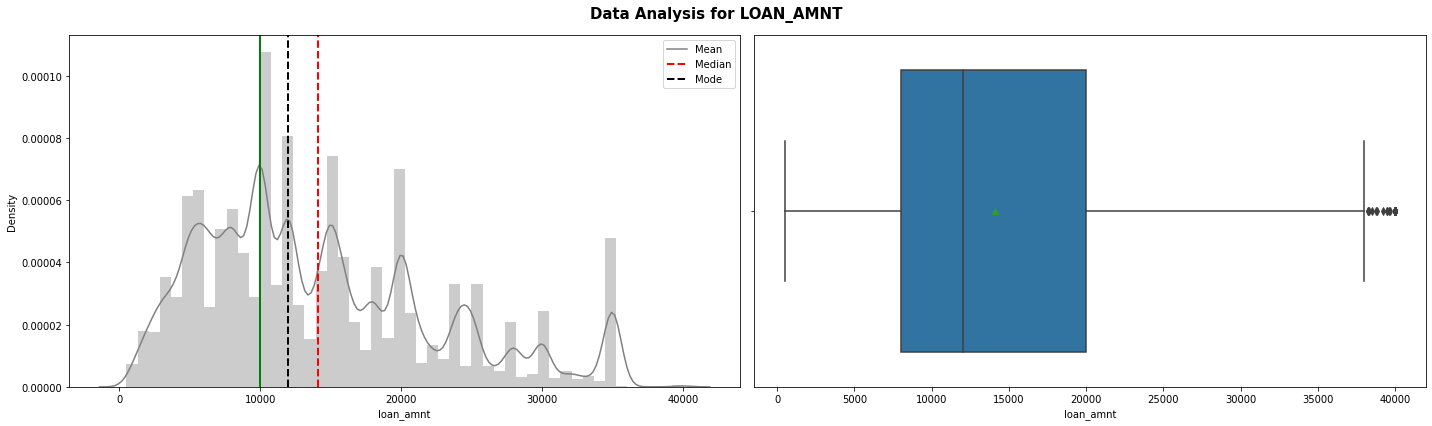

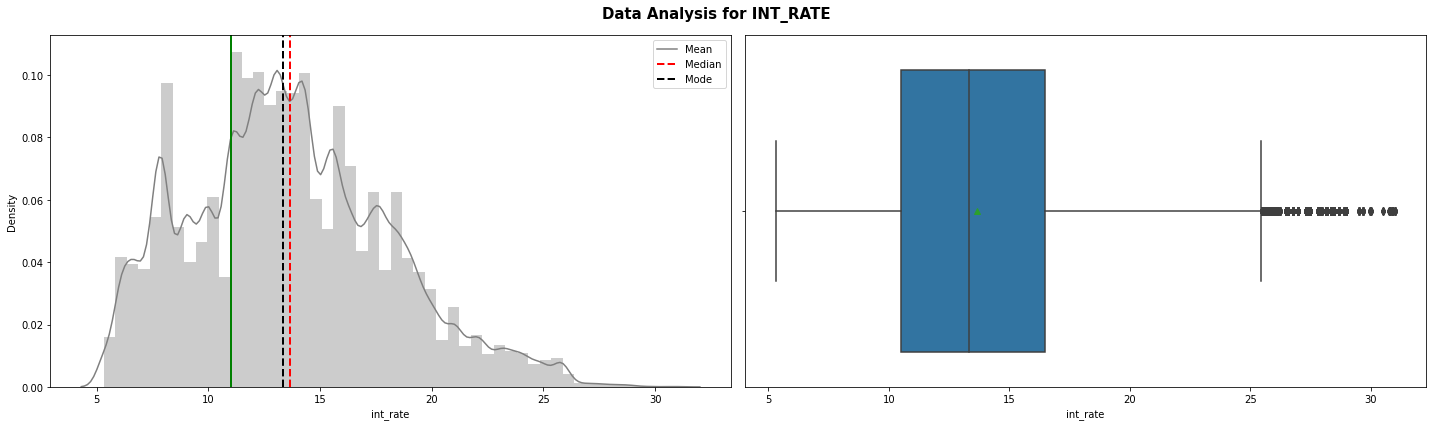

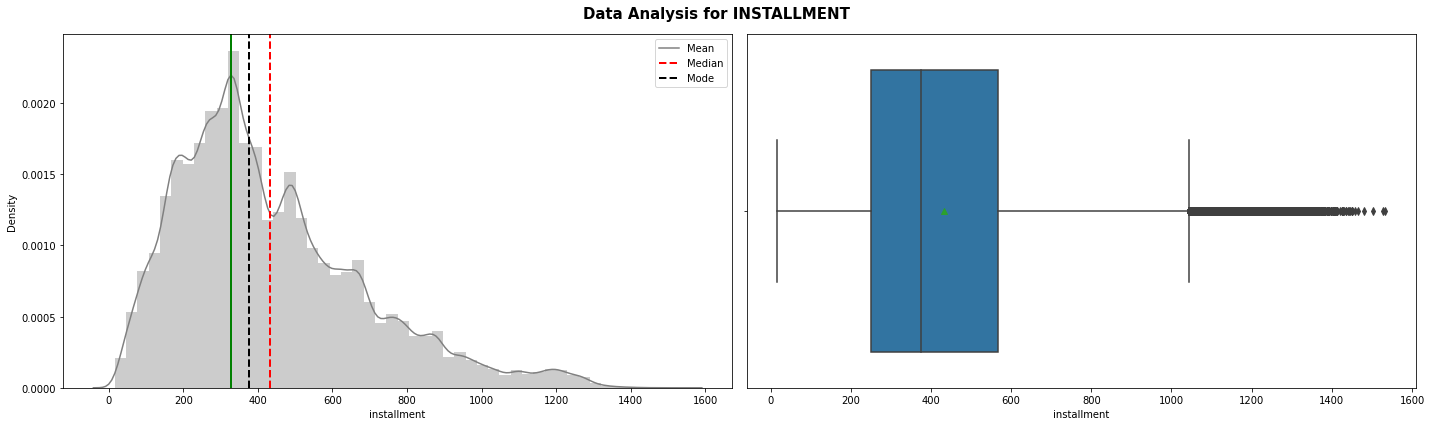

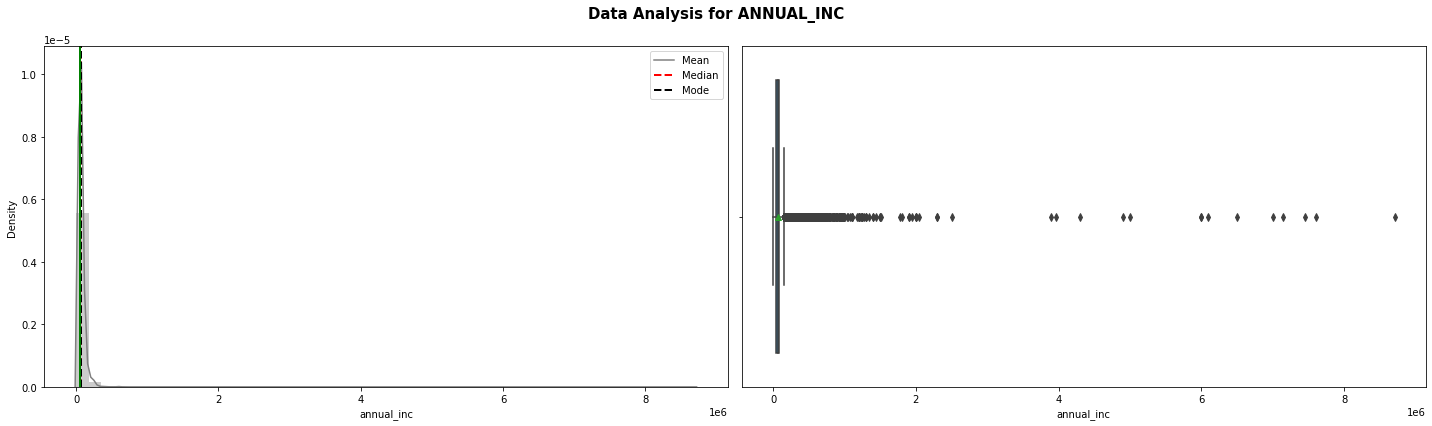

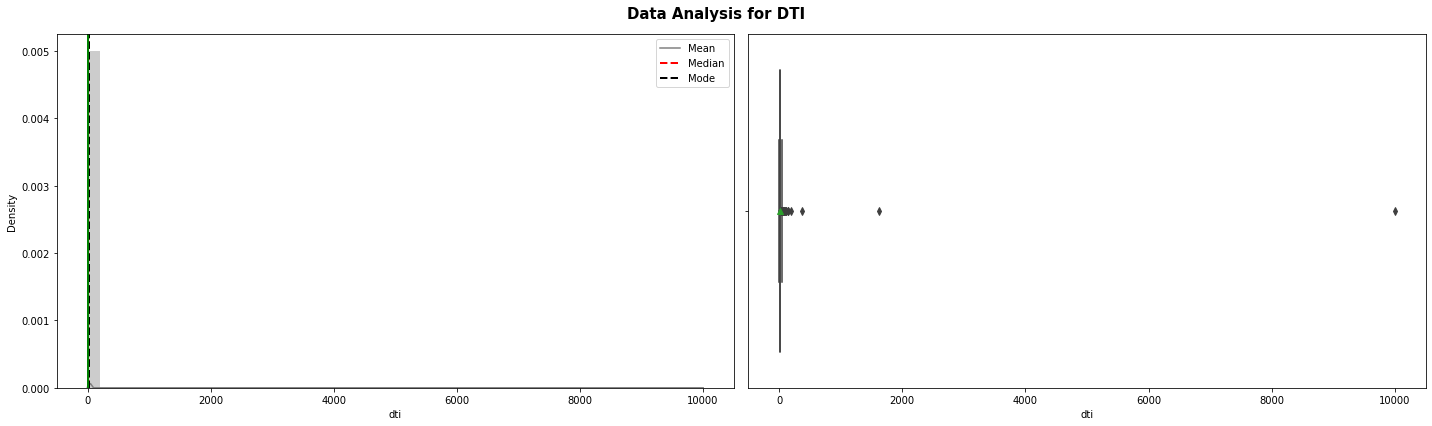

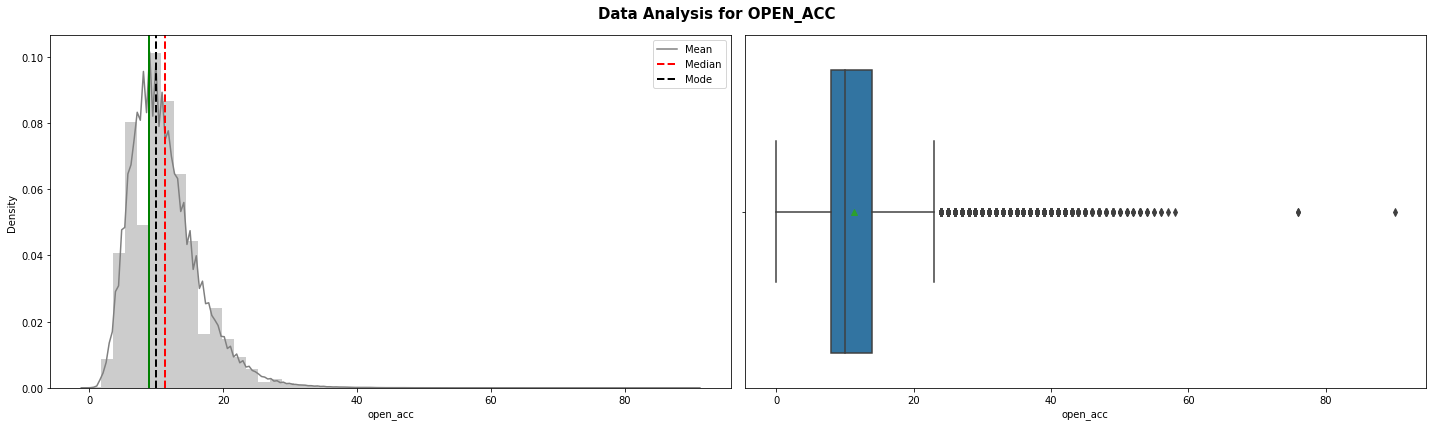

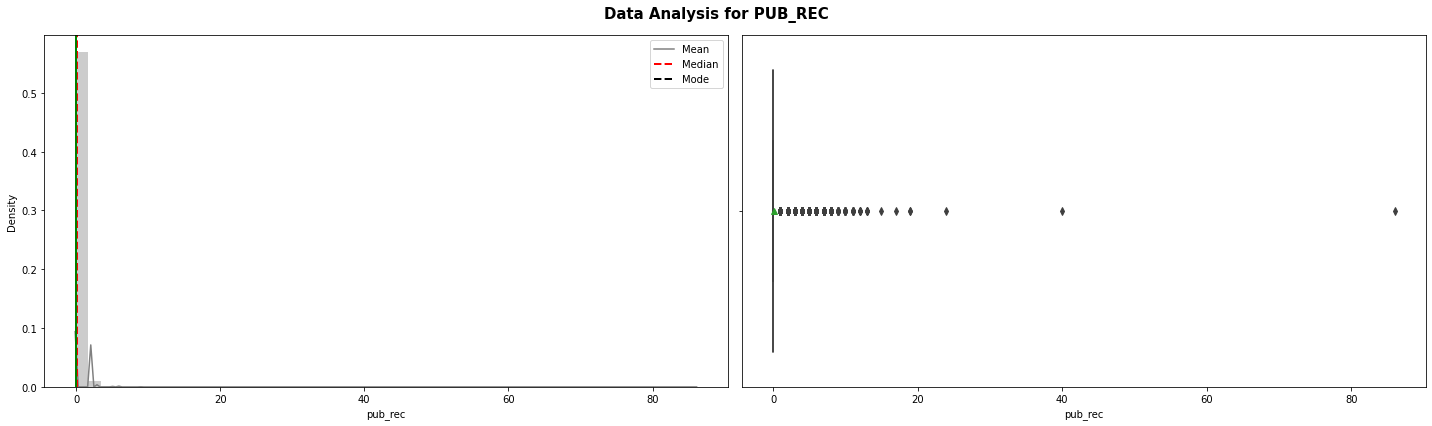

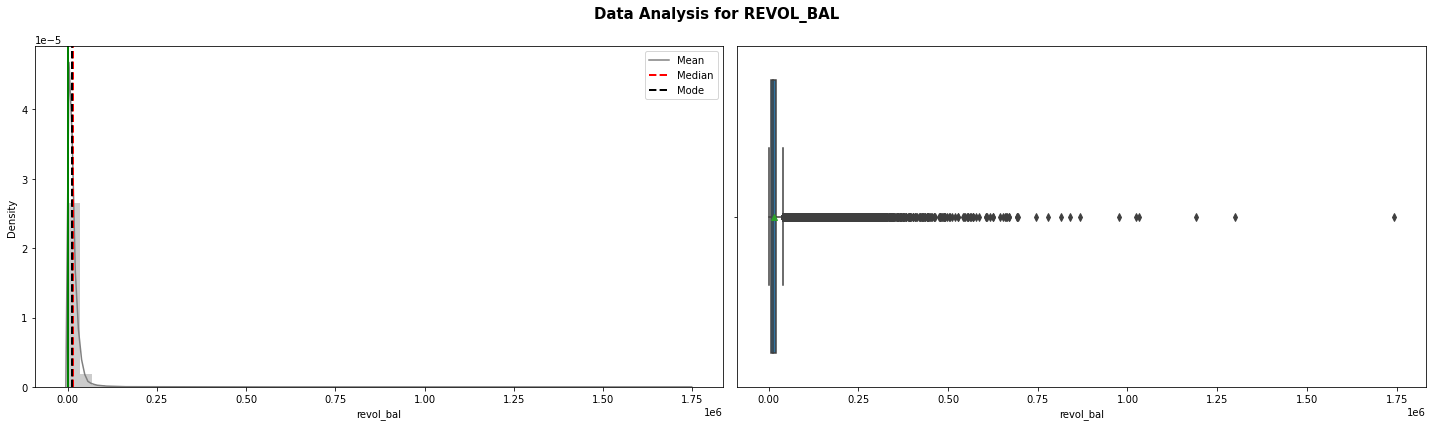

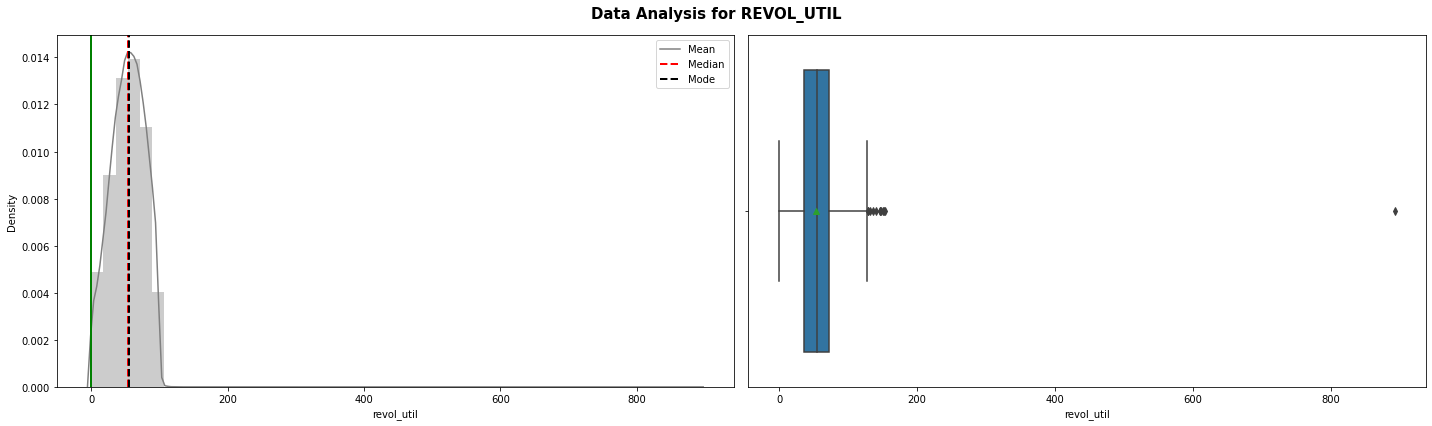

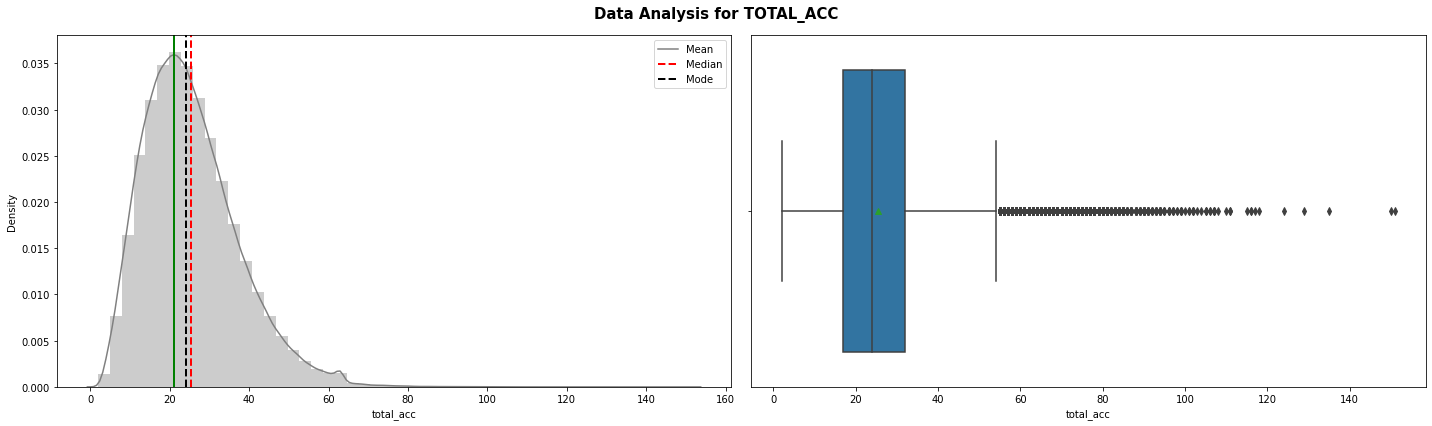

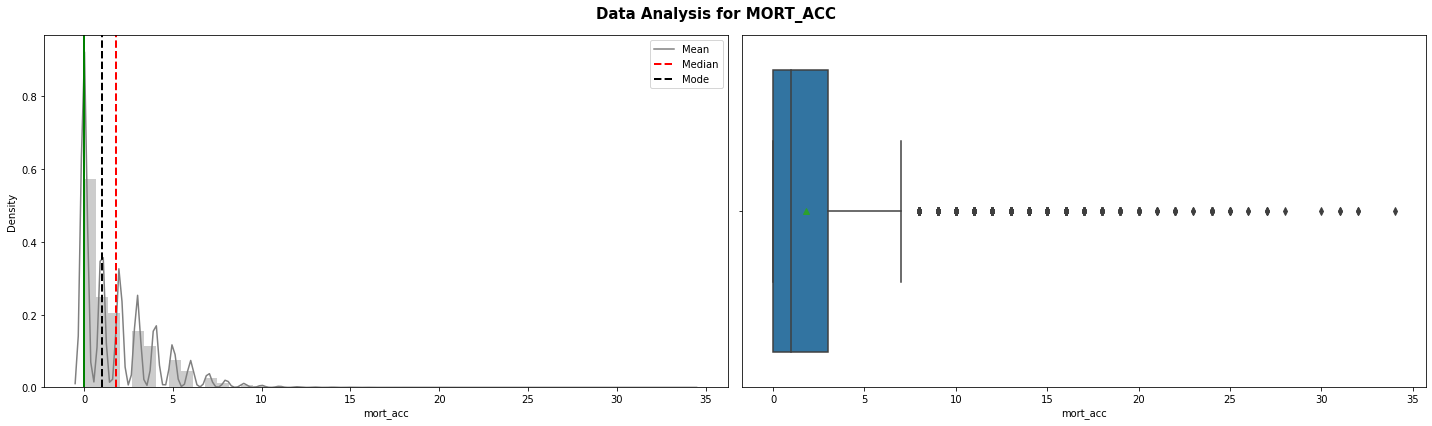

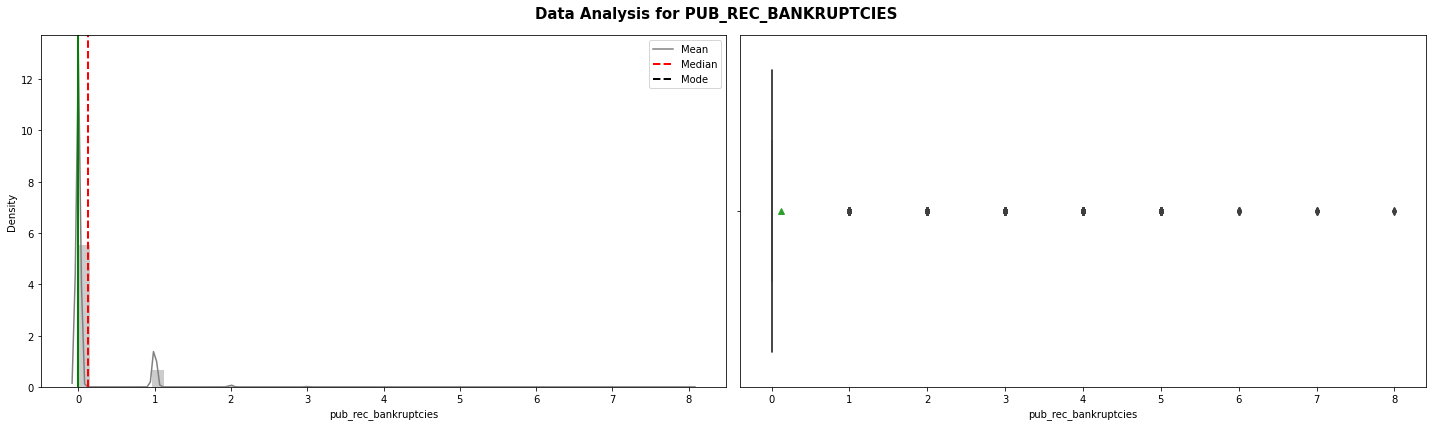

In [11]:
# Univariate Analysis for continuous variables
def numfeat(col):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
    fig.suptitle("Data Analysis for "+col.name.upper(),fontsize=15,fontweight="bold")
    sns.distplot(col,kde=True,ax=ax[0],color="grey")
    
    ax[0].axvline(col.mean(),color='r',linestyle='--',linewidth=2)
    ax[0].axvline(col.median(),color='k',linestyle='dashed',linewidth=2)
    ax[0].axvline(col.mode()[0],color='g',linestyle='solid',linewidth=2)
    
    sns.boxplot(x=col,showmeans=True,ax=ax[1])
    ax[0].legend({'Mean':col.mean(),'Median':col.median(),'Mode':col.mode()})
    plt.tight_layout()
    
num=['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies']
for i in num:
    numfeat(d[i])

Outliers are pretty much present in  every numerical column

In [12]:
d.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

C:\Users\ANOOP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ANOOP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ANOOP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

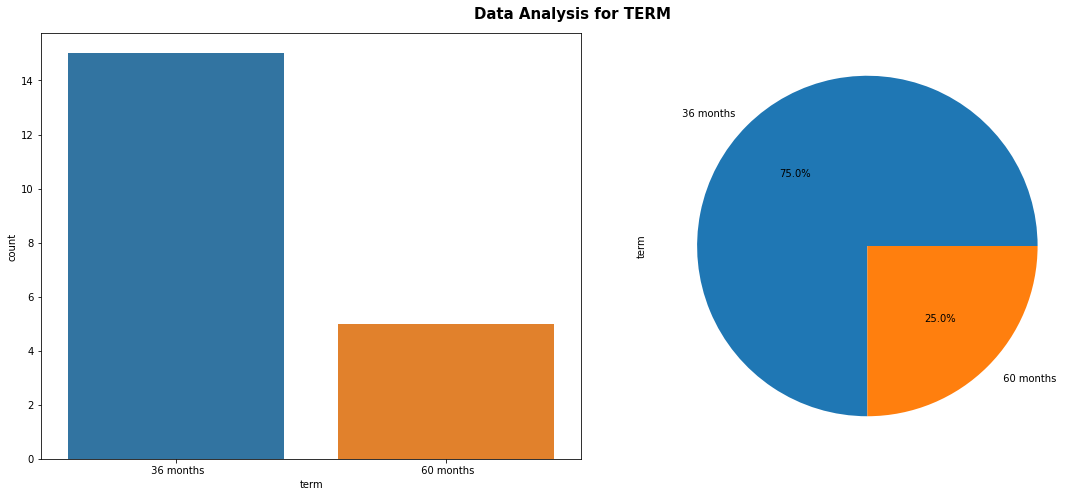

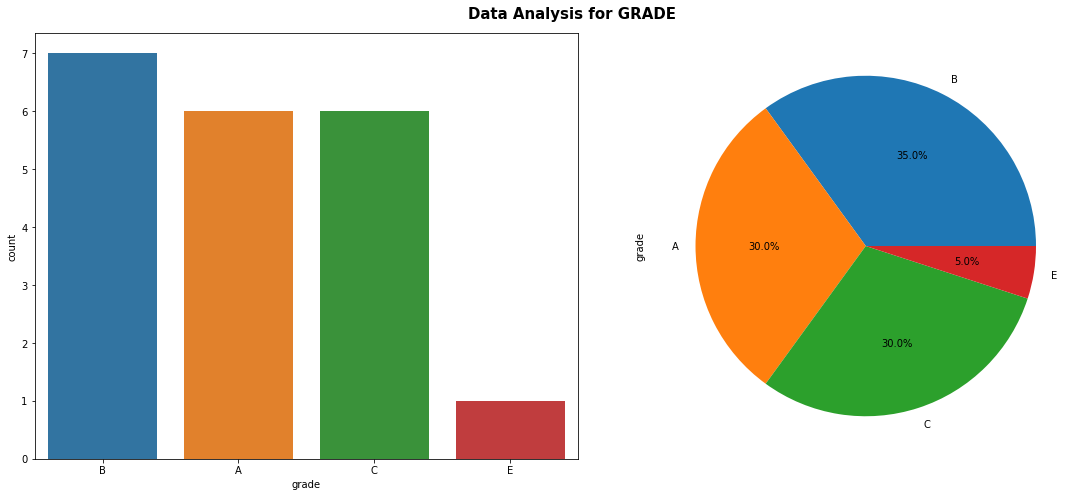

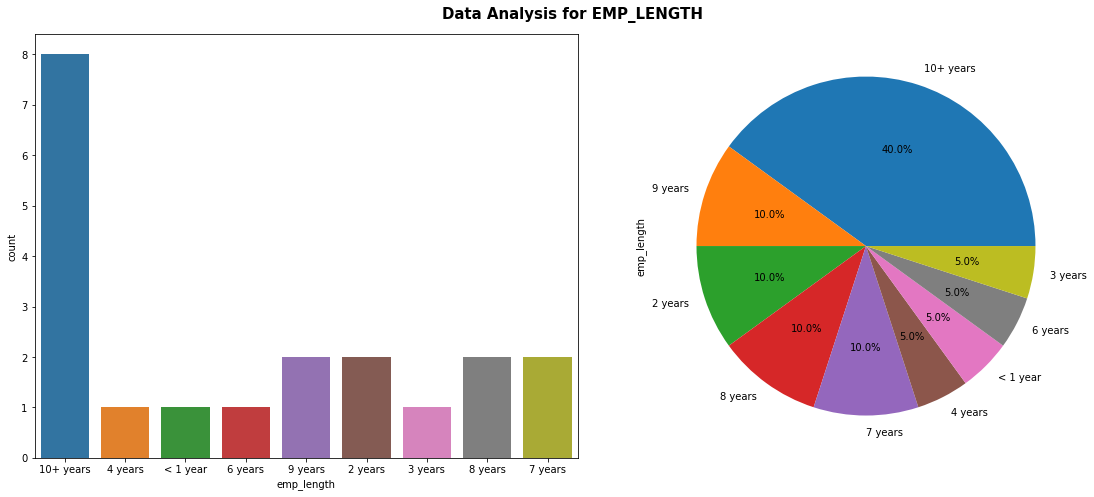

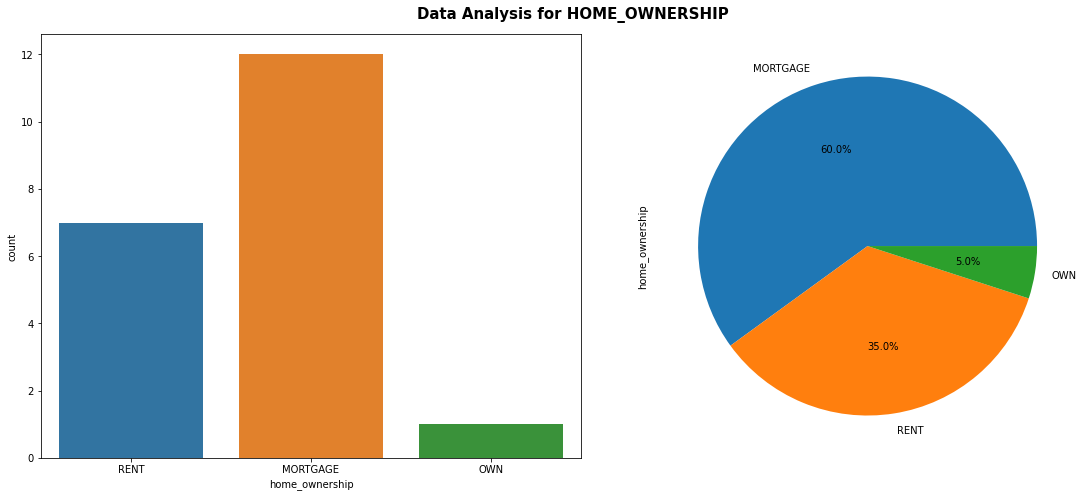

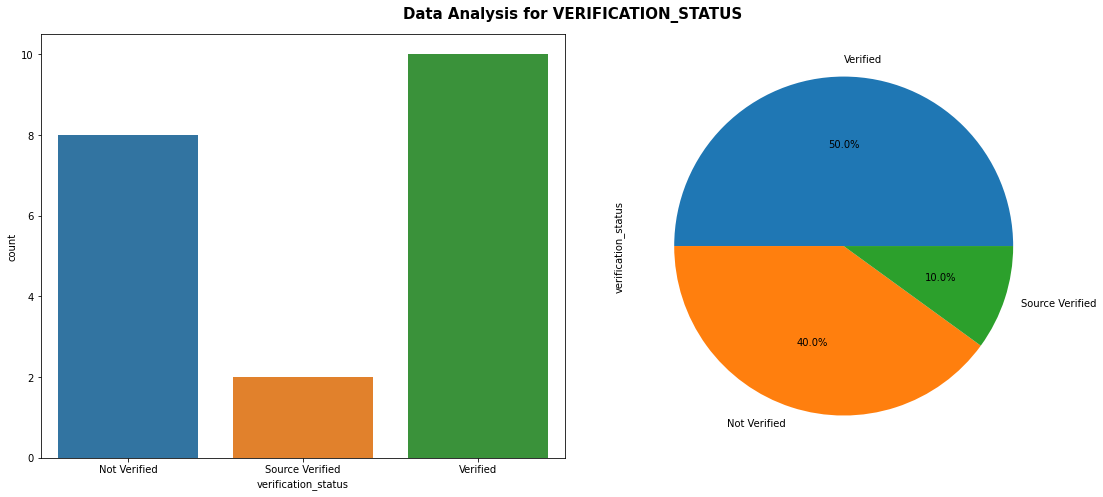

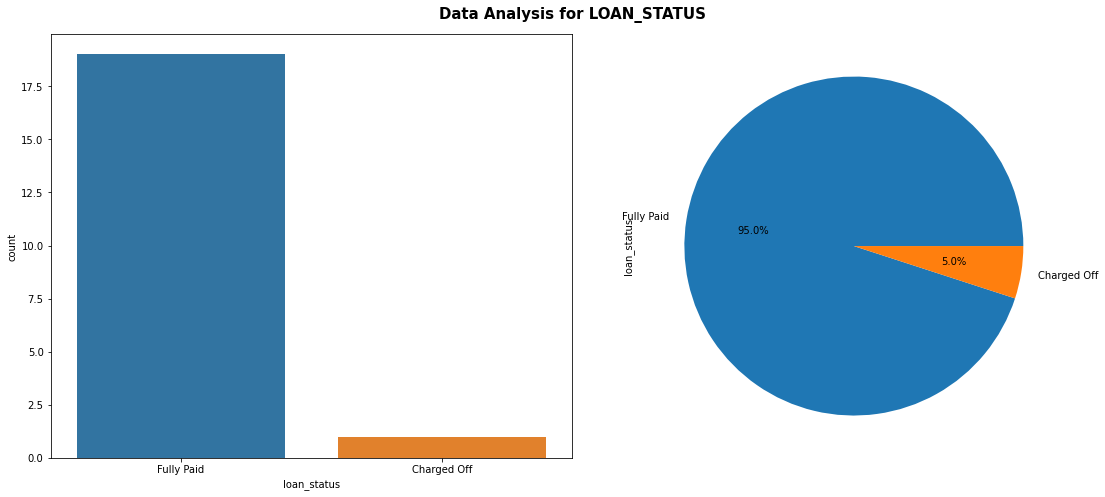

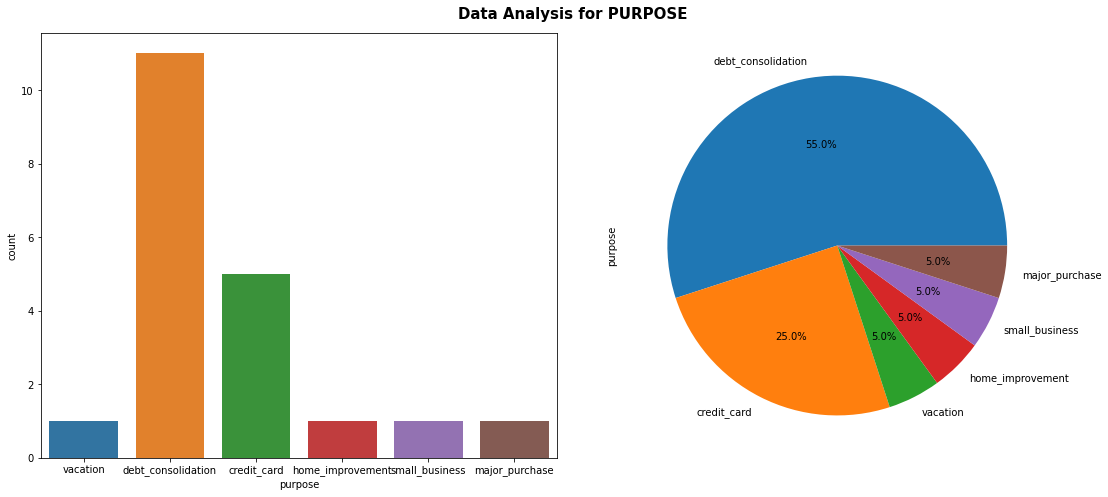

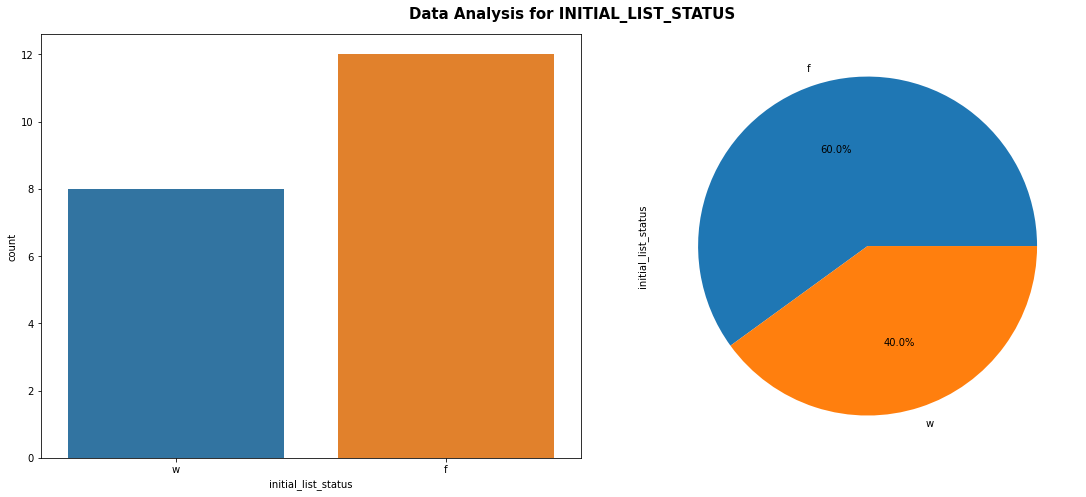

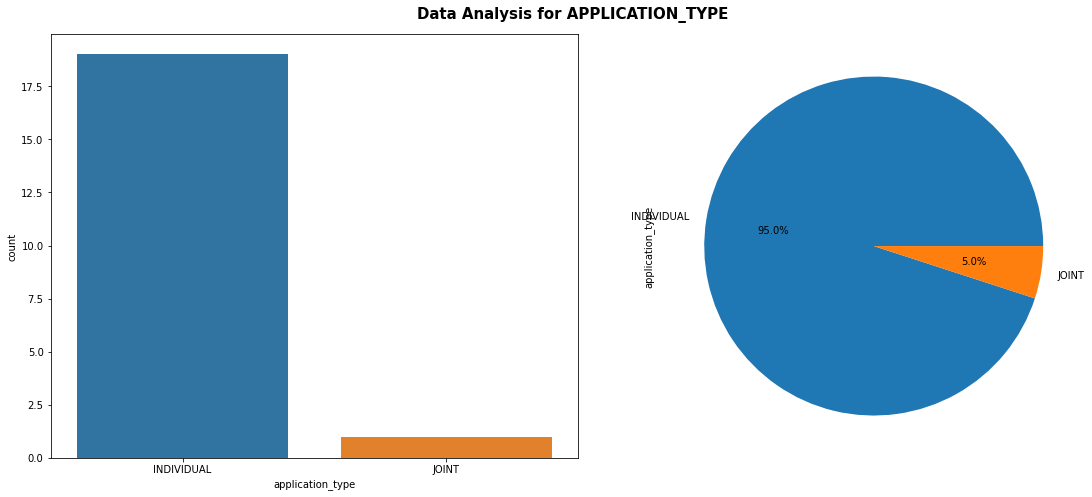

In [13]:
# Univariate analysis for categorical variables
def catfeat(col):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,7))
    
    fig.suptitle("Data Analysis for "+col.name.upper(),fontsize=15,fontweight='bold')
    
    sns.countplot(col,ax=ax[0])
    col.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
    plt.tight_layout()

cat=['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type']
for i in cat:
    catfeat(d[i][:20])

Data Exploration and Structure and Characterstics of data

In [14]:
d.groupby(by=['loan_status'])['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


The no of people those who have fully paid the loan are 318357 and that of charged off are 77673

In [15]:
d["home_ownership"].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [16]:
d.loc[(d.home_ownership=='ANY')| (d.home_ownership=="NONE"),'home_ownership']="OTHER"
d.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

In [17]:
# Checking the distribution of other
d.loc[d['home_ownership']=='OTHER','loan_status'].value_counts()

Fully Paid     123
Charged Off     23
Name: loan_status, dtype: int64

In [18]:
# Converting object to Data- Time format
d['issue_d']=pd.to_datetime(d['issue_d'])
d['earliest_cr_line']=pd.to_datetime(d['earliest_cr_line'])

In [19]:
# Title has same things in upper case/lower case
d['title'].value_counts()[:20]

Debt consolidation           152472
Credit card refinancing       51487
Home improvement              15264
Other                         12930
Debt Consolidation            11608
Major purchase                 4769
Consolidation                  3852
debt consolidation             3547
Business                       2949
Debt Consolidation Loan        2864
Medical expenses               2742
Car financing                  2139
Credit Card Consolidation      1775
Vacation                       1717
Moving and relocation          1689
consolidation                  1595
Personal Loan                  1591
Consolidation Loan             1299
Home Improvement               1268
Home buying                    1183
Name: title, dtype: int64

In [20]:
# converting it to lower case
d['title']=d.title.str.lower()

In [21]:
d.title.value_counts()[:20]

debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
personal loan                  2460
car financing                  2160
credit card payoff             1904
consolidation loan             1887
vacation                       1866
credit card refinance          1832
moving and relocation          1693
consolidate                    1528
personal                       1465
home buying                    1196
Name: title, dtype: int64

---------------------------------------------------------------------------------------------------------------------------------------

Data Visualization

---------------------------------------------------------------------------------------------------------------------------------------

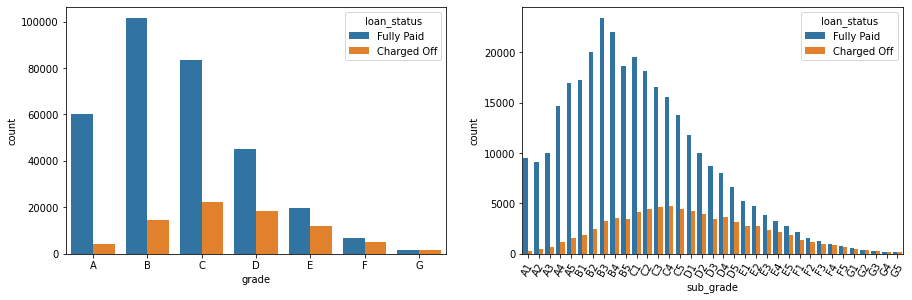

In [23]:
# Loan Status wrt Grade and Subgrade
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
grade=sorted(d['grade'].unique().tolist())
sns.countplot(x='grade',hue='loan_status',data=d,order=grade)

plt.subplot(2,2,2)
sgrade=sorted(d['sub_grade'].unique().tolist())
g1=sns.countplot(x='sub_grade',hue='loan_status',data=d,order=sgrade)
g1.set_xticklabels(g1.get_xticklabels(),rotation=60);

In [24]:
# The majority of the people who have fully paid the loan fall under the category of Grade:B and Sub-Grade: B3
# G would be the worst grade as half of the loan status was charged off.

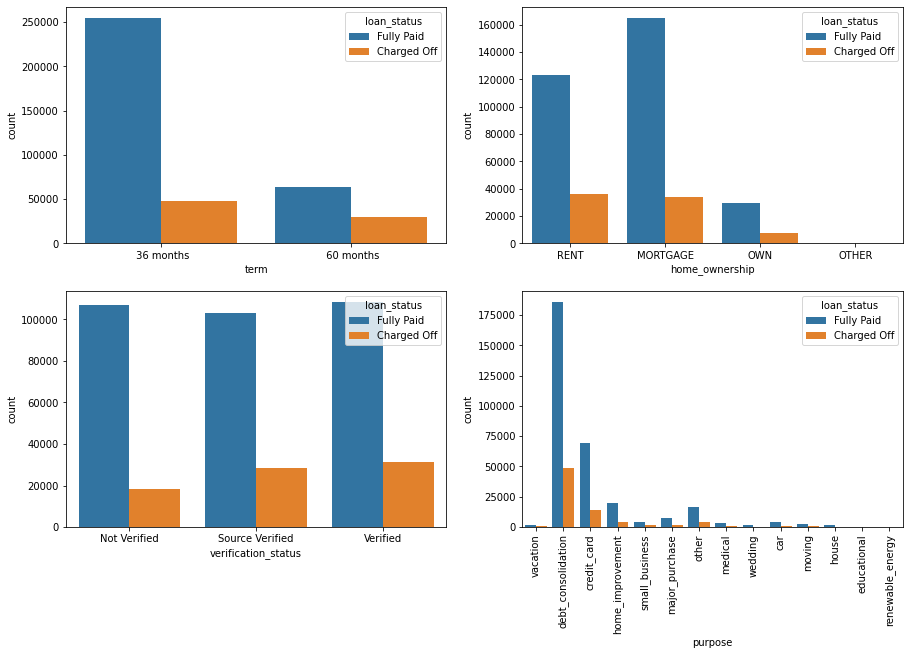

In [25]:
# 
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.countplot(x='term',data=d,hue='loan_status')

plt.subplot(4,2,2)
sns.countplot(x='home_ownership',data=d,hue='loan_status')

plt.subplot(4,2,3)
sns.countplot(x='verification_status',data=d,hue='loan_status')

plt.subplot(4,2,4)
g2=sns.countplot(x='purpose',data=d,hue='loan_status')
g2.set_xticklabels(g2.get_xticklabels(),rotation=90);


In [26]:
# Most of the loan are taken for Debt consolidation purpose 
# Majority of the loan are taken for around 36months tenure.
# People who have mortgage loan pay their loan fully compared to others.(Beacuse of Collateral as house)

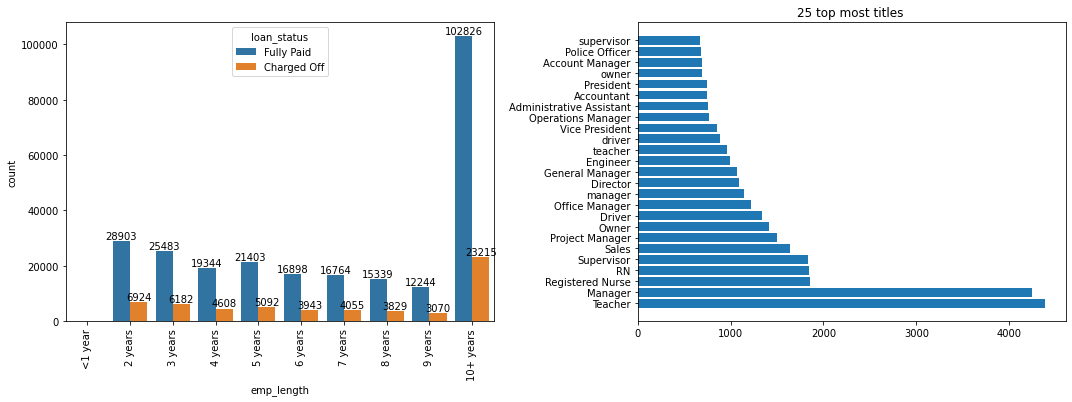

In [27]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
year_order=['<1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
g3=sns.countplot(x=d.emp_length,data=d,hue='loan_status',order=year_order)
g3.set_xticklabels(g3.get_xticklabels(),rotation=90)
for i in g3.containers:
    g3.bar_label(i)

plt.subplot(2,2,2)
plt.barh(d.emp_title.value_counts().index[:25],d.emp_title.value_counts()[:25])
plt.title("25 top most titles ")
plt.tight_layout()
plt.show()

In [28]:
0,4.17,4.12,4.19,4.20,4.28,4.13,4.00,3.9,

(0, 4.17, 4.12, 4.19, 4.2, 4.28, 4.13, 4.0, 3.9)

In [29]:
# Manager,Teacher,Registered Nurse,RN,Supervisor are the top 5 employee titles that can afford a loan
# Employeement length of 9 years has more chargedoff to Full paid ratio whereas employeement length of 10 years has more full paid to charged off ratio.

---------------------------------------------------------------------------------------------------------------------------------------

FEATURE ENGINEERING

---------------------------------------------------------------------------------------------------------------------------------------

In [30]:
# Creation of flags
def pub_r(num):
    if num==0.0:
        return 0
    else:
        return 1

def mort_ac(num):
    if num==0.0:
        return 0
    elif num>=1.0:
        return 1
    else:
        return num

def pub_r_bankruptcies(num):
    if num==0.0:
        return 0
    elif num>=1.0:
        return 1
    else:
        return num
    

In [31]:
# Applying the above into to the data
d['pub_rec']=d.pub_rec.apply(pub_r)
d['mort_acc']=d.mort_acc.apply(mort_ac)
d['pub_rec_bankruptcies']=d.pub_rec_bankruptcies.apply(pub_r_bankruptcies)

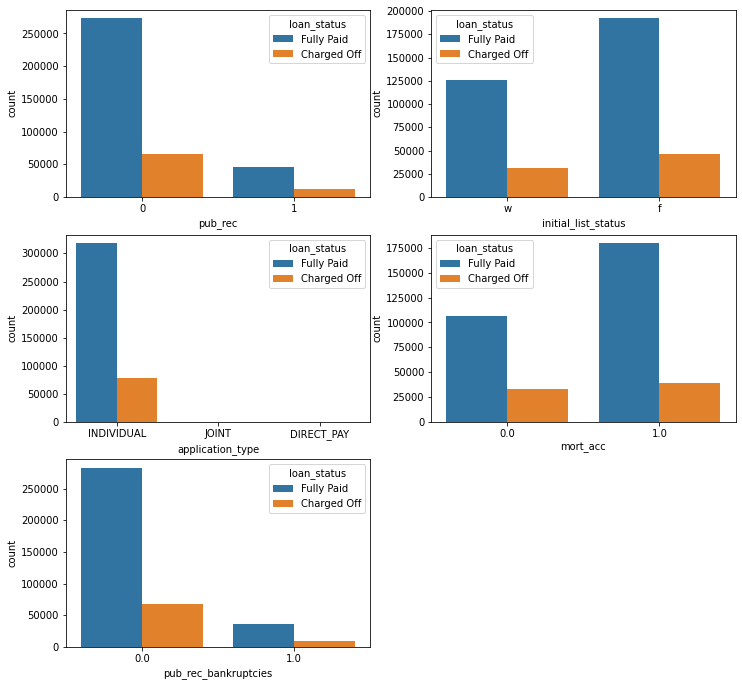

In [32]:
# Now checking changed values via barcharts wrt Loan_Status
plt.figure(figsize=(12,20))

plt.subplot(5,2,1)
sns.countplot(x='pub_rec',data=d,hue='loan_status')

plt.subplot(5,2,2)
sns.countplot(x='initial_list_status',data=d,hue='loan_status')

plt.subplot(5,2,3)
sns.countplot(x='application_type',data=d,hue='loan_status')

plt.subplot(5,2,4)
sns.countplot(x='mort_acc',data=d,hue='loan_status')

plt.subplot(5,2,5)
sns.countplot(x='pub_rec_bankruptcies',data=d,hue='loan_status')

plt.show()

In [33]:
d.initial_list_status.value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

In [34]:
# Loan_Status is the Target Variable so converting it into num to use this during model building
d['loan_status']=d.loan_status.map({'Fully Paid':0,'Charged Off':1})

In [35]:
null

,Missing_Values,Missing_Percent
mort_acc,37795,9.5435
emp_title,22927,5.7892
emp_length,18301,4.6211
title,1755,0.4431
pub_rec_bankruptcies,535,0.1351
revol_util,276,0.0697
loan_amnt,0,0.0000
dti,0,0.0000
application_type,0,0.0000
initial_list_status,0,0.0000


In [36]:
# Most of the null values are in mort_acc so replacing 
t=d.groupby(by='total_acc').mean().mort_acc
t

total_acc
2.0      0.000000
3.0      0.046243
4.0      0.062140
5.0      0.090789
6.0      0.121983
           ...   
124.0    1.000000
129.0    1.000000
135.0    1.000000
150.0    1.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [37]:
def fill_mort_ac(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return t[total_acc].round()
    else:
        return mort_acc

In [38]:
d['mort_acc']=d.apply(lambda x: fill_mort_ac(x['total_acc'],x['mort_acc']),axis=1)

In [39]:
d.isnull().sum()/len(d)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [40]:
d.describe()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,0.196129,17.379514,11.311153,0.145842,1.584454e+04,53.791749,25.414744,0.613070,0.114072
std,8357.441341,4.472157,250.727790,6.163762e+04,0.397068,18.019092,5.137649,0.352949,2.059184e+04,24.452193,11.886991,0.487048,0.317899
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,0.000000,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,0.000000,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,0.000000,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,1.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,1.000000,9999.000000,90.000000,1.000000,1.743266e+06,892.300000,151.000000,1.000000,1.000000


In [41]:
# Dropping rows with null values as the percent of data are less than 5
d.dropna(inplace=True)

In [42]:
d.shape

(370622, 27)

---------------------------------------------------------------------------------------------------------------------------------------

Outlier Detection and Removal

---------------------------------------------------------------------------------------------------------------------------------------

In [43]:
num_data=d.select_dtypes(include='number')
num_col=num_data.columns
num_col

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

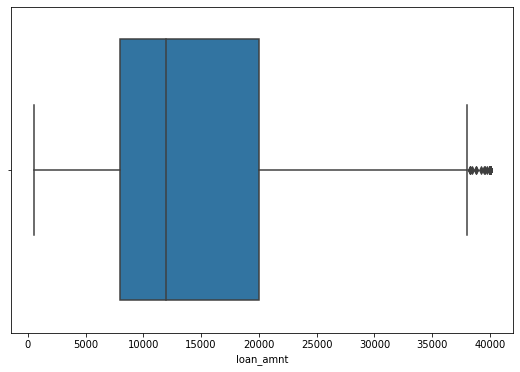

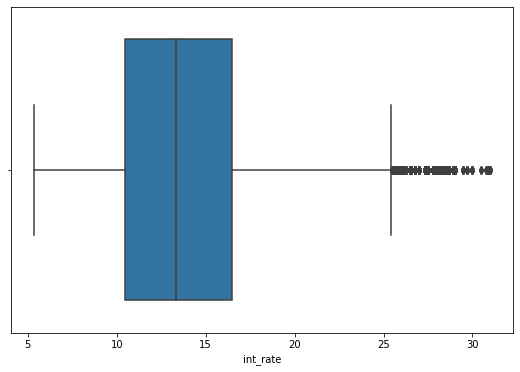

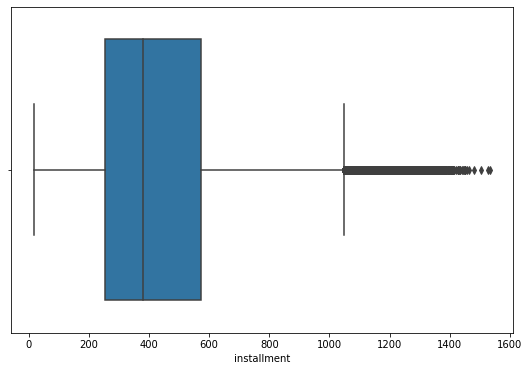

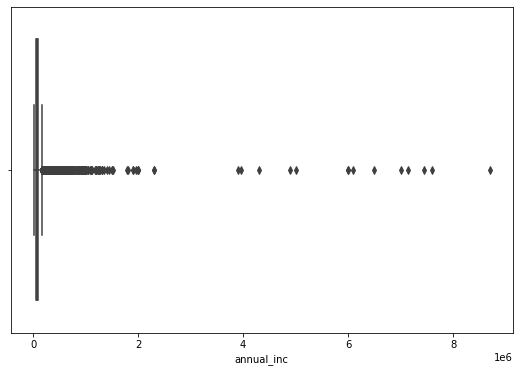

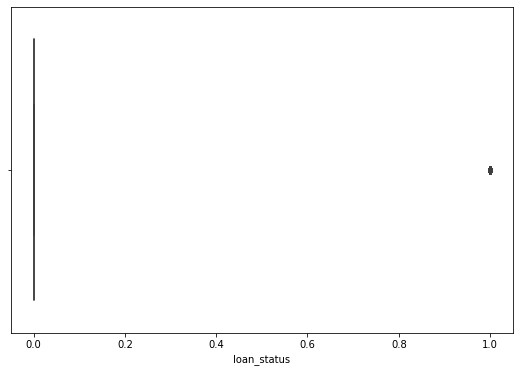

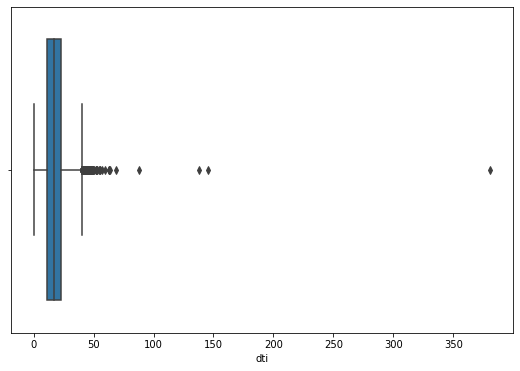

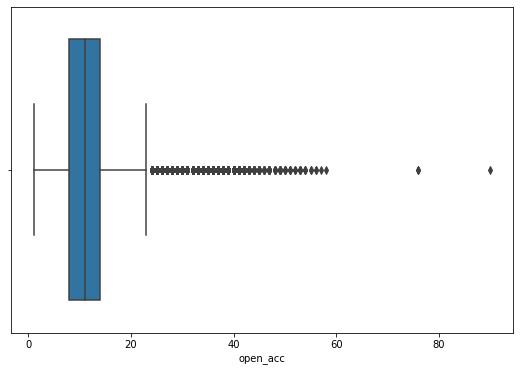

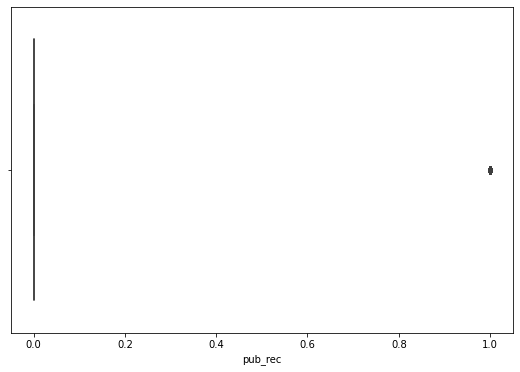

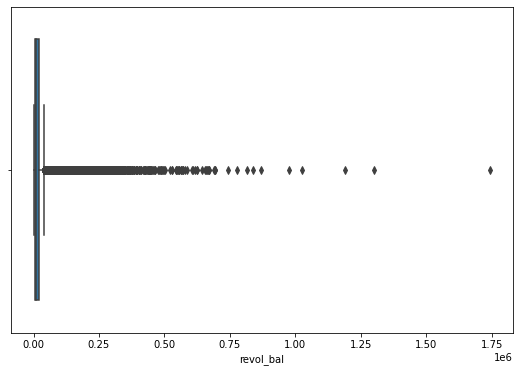

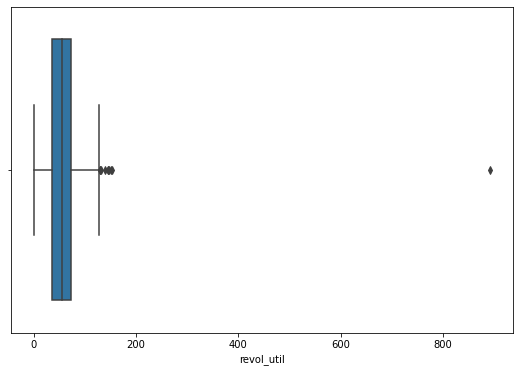

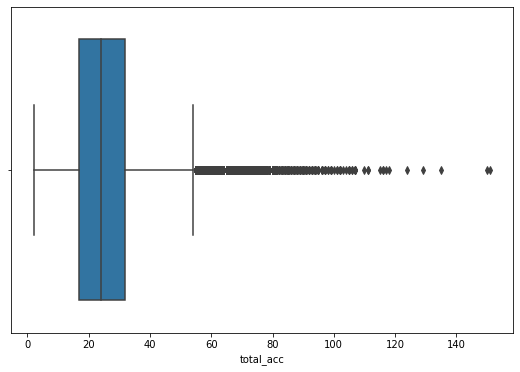

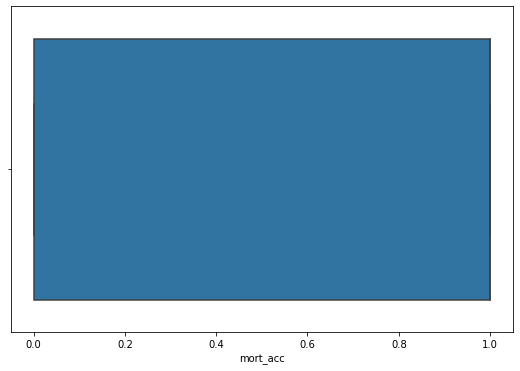

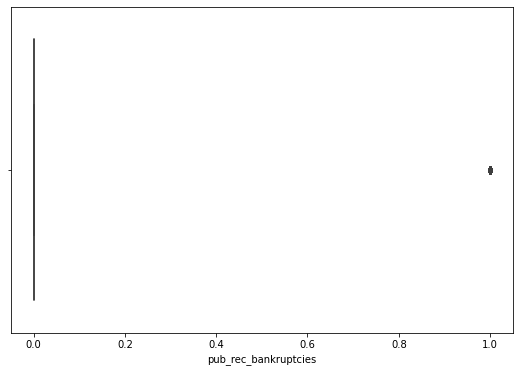

In [44]:
def boxplot(col):
    plt.figure(figsize=(9,6))
    sns.boxplot(x=d[col])
    plt.show()


for col in num_col:
    boxplot(col)

In [45]:
# Outlier Treatment

for i in num_col:
    mean=d[i].mean()
    std=d[i].std()
    
    upper_l=mean+3*std
    lower_l=mean-3*std
    
    d=d[(d[i]<upper_l) & (d[i]>lower_l)]

In [46]:
d.shape

(350358, 27)

---------------------------------------------------------------------------------------------------------------------------------------

Data Preprocessing

---------------------------------------------------------------------------------------------------------------------------------------

In [47]:
d.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [48]:
# Changing Into num data
new_term={' 36 months':36,' 60 months':60}
d['term']=d.term.map(new_term)

In [49]:
d.initial_list_status.unique()

array(['w', 'f'], dtype=object)

In [50]:
# List status into num data
new_liststatus={'w':0,'f':1}
d['initial_list_status']=d.initial_list_status.map(new_liststatus)

In [51]:
d.initial_list_status.value_counts()

1    211350
0    139008
Name: initial_list_status, dtype: int64

In [52]:
# Fetching pincode from the address
d['Zipcode']=d.address.apply(lambda x: x[-5:])

In [53]:
d.Zipcode.value_counts()

70466    50365
30723    50065
22690    50004
48052    49495
00813    40661
29597    40463
05113    40358
93700     9700
11650     9680
86630     9567
Name: Zipcode, dtype: int64

In [54]:
d.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,Zipcode
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0,36369.0,41.8,25.0,0,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",22690
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0,20131.0,53.3,27.0,1,INDIVIDUAL,1.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",05113
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0,11987.0,92.2,26.0,1,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",05113
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0,5472.0,21.5,13.0,1,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",00813
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0,24584.0,69.8,43.0,1,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",11650


In [55]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350358 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             350358 non-null  float64       
 1   term                  350358 non-null  int64         
 2   int_rate              350358 non-null  float64       
 3   installment           350358 non-null  float64       
 4   grade                 350358 non-null  object        
 5   sub_grade             350358 non-null  object        
 6   emp_title             350358 non-null  object        
 7   emp_length            350358 non-null  object        
 8   home_ownership        350358 non-null  object        
 9   annual_inc            350358 non-null  float64       
 10  verification_status   350358 non-null  object        
 11  issue_d               350358 non-null  datetime64[ns]
 12  loan_status           350358 non-null  int64         
 13 

In [56]:
d.drop(columns=['issue_d','emp_title','title','sub_grade','address','earliest_cr_line','emp_length'],axis=1,inplace=True)

In [57]:
# One-hot-Encoding:

In [61]:
newcol = ['purpose','Zipcode','grade','verification_status','application_type','home_ownership']
d=pd.get_dummies(d,columns=newcol,drop_first=True)

In [63]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
d.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,Zipcode_05113,Zipcode_11650,Zipcode_22690,Zipcode_29597,Zipcode_30723,Zipcode_48052,Zipcode_70466,Zipcode_86630,Zipcode_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,329.48,117000.0,0,26.24,16.0,0,36369.0,41.8,25.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,0,22.05,17.0,0,20131.0,53.3,27.0,1,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,0,12.79,13.0,0,11987.0,92.2,26.0,1,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,0,2.60,6.0,0,5472.0,21.5,13.0,1,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,1,33.95,13.0,0,24584.0,69.8,43.0,1,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0


---------------------------------------------------------------------------------------------------------------------------------------

Data Modelling

---------------------------------------------------------------------------------------------------------------------------------------

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
 accuracy_score, confusion_matrix, classification_report,
 roc_auc_score, roc_curve, auc,
 plot_confusion_matrix, plot_roc_curve
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE


In [107]:
# Feature variable to X
X=d.drop('loan_status',axis=1)

# Response variable to y
y=d['loan_status']

In [68]:
# Split into Training and Testing variable using test_train_split_module
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,stratify=y,random_state=42)

In [69]:
print(X_train.shape)
print(X_test.shape)

(245250, 49)
(105108, 49)


Using minmaxscaler to standardize the data.
MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information
embedded in the original data.


In [70]:
# Standardizing the data

In [71]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [72]:
# Logistic Regression

In [73]:
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [131]:
logreg.coef_

array([[-0.14436337,  0.5390163 ,  0.09612162,  0.67189616, -1.12875151,
         1.00576607,  0.76717937,  0.19901784, -0.49041689,  0.46829393,
        -0.60992999, -0.01939272, -0.06073962, -0.16526679,  0.18833113,
         0.26886746,  0.51531753,  0.3473083 ,  0.19005347,  0.22930035,
         0.4583294 ,  0.31714939,  0.290714  ,  0.56090394,  0.74287684,
         0.26189035, -0.27383053, -2.87638178, 12.61486717,  4.86332155,
        -2.88850764,  4.84879071,  4.89695883,  4.87940899, 12.5850287 ,
        12.61623725,  0.53938186,  0.97996312,  1.27335578,  1.47851965,
         1.57995807,  1.66460209,  0.18211619,  0.04861525,  0.59326429,
        -0.48255286,  0.59970721,  0.1039233 ,  0.25741785]])

In [132]:
logreg.intercept_

array([-8.94390996])

In [77]:
y_pred=logreg.predict(X_test)
print("Accuracy of Logistic Regression Classifier on training data",+logreg.score(X_train,y_train).round(3))

Accuracy of Logistic Regression Classifier on test data 0.892


In [133]:
print("Accuracy of Logistic Regression Classifier on test data",+logreg.score(X_test,y_test).round(3))

Accuracy of Logistic Regression Classifier on test data 0.891


In [83]:
# confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)


[[84387   528]
 [10887  9306]]


In [84]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     84915
           1       0.95      0.46      0.62     20193

    accuracy                           0.89    105108
   macro avg       0.92      0.73      0.78    105108
weighted avg       0.90      0.89      0.88    105108



In [85]:
# Recall and f1_score are too low probably because of droping columns or imbalance in the data

In [87]:
# ROC (Receiver operating characterstic curve) Curve and AUC (Area under the ROC curve)

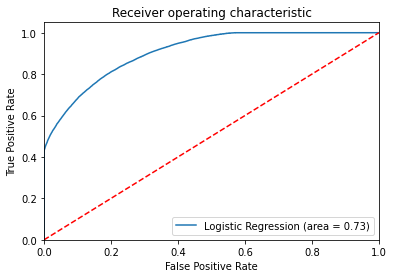

In [88]:
log_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [89]:
# Precision recall curve and Threshold value

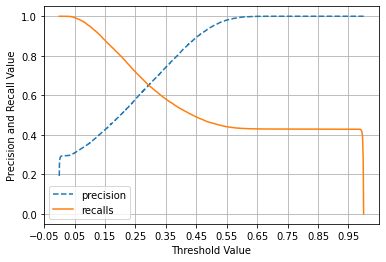

In [92]:
def precision_recall_curve_plot(y_test, pred_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    threshold_boundary = thresholds.shape[0]
    
    # ploting precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
             
    # ploting recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); 
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, logreg.predict_proba(X_test)[:,1])

---------------------------------------------------------------------------------------------------------------------------------------

Multicollinearity check and Variance Inflation Factor (VIF)

---------------------------------------------------------------------------------------------------------------------------------------

In [94]:
# Correlation Heatmap

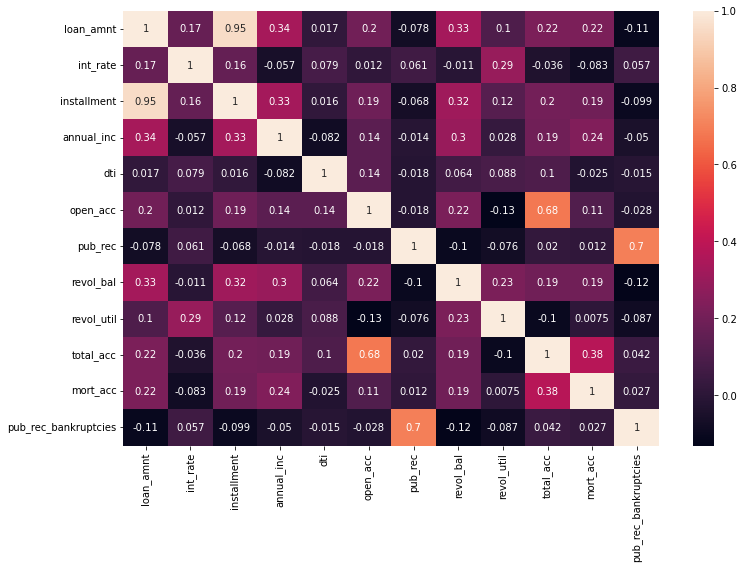

In [98]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [99]:
d.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'Zipcode_05113', 'Zipcode_11650',
       'Zipcode_22690', 'Zipcode_29597', 'Zipcode_30723', 'Zipcode_48052',
       'Zipcode_70466', 'Zipcode_86630', 'Zipcode_93700', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_own

In [101]:
xx=X.copy(deep=True)

In [100]:
# Calculating VIF
def c_vif(x):
    vif=pd.DataFrame()
    vif['Feature']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

c_vif(X)[:5]


,Feature,VIF
0,loan_amnt,239.03
3,installment,215.81
44,application_type_INDIVIDUAL,200.15
2,int_rate,129.98
1,term,125.41


In [109]:
X.drop(columns=['loan_amnt'],axis=1,inplace=True)
c_vif(X)[:5]

,Feature,VIF
43,application_type_INDIVIDUAL,154.77
1,int_rate,122.81
14,purpose_debt_consolidation,50.49
0,term,25.81
13,purpose_credit_card,18.36


In [110]:
X.drop(columns=['application_type_INDIVIDUAL'],axis=1,inplace=True)
c_vif(X)[:5]

,Feature,VIF
1,int_rate,103.57
14,purpose_debt_consolidation,27.59
0,term,23.24
5,open_acc,13.73
9,total_acc,12.66


In [113]:
X.drop(columns=['int_rate'],axis=1,inplace=True)
c_vif(X)[:5]

,Feature,VIF
13,purpose_debt_consolidation,22.73
0,term,22.21
4,open_acc,13.61
8,total_acc,12.66
7,revol_util,8.99


In [114]:
X.drop(columns=['purpose_debt_consolidation'],axis=1,inplace=True)
c_vif(X)[:5]

,Feature,VIF
0,term,17.95
4,open_acc,13.17
8,total_acc,12.65
7,revol_util,8.28
2,annual_inc,7.90


In [115]:
X.drop(columns=['term'],axis=1,inplace=True)
c_vif(X)[:5]

,Feature,VIF
3,open_acc,13.09
7,total_acc,12.60
6,revol_util,8.25
1,annual_inc,7.60
2,dti,7.58


In [116]:
X.drop(columns=['open_acc'],axis=1,inplace=True)
c_vif(X)[:5]

,Feature,VIF
6,total_acc,8.23
5,revol_util,7.94
1,annual_inc,7.52
2,dti,7.02
0,installment,6.64


In [119]:
X=scaler.fit_transform(X)
kfold=KFold(n_splits=5)
accuracy = np.mean(cross_val_score(logreg,X,y,cv=kfold,scoring='accuracy',n_jobs=-1))
print("Cross Validation Accuracy",+accuracy.round(3))

Cross Validation Accuracy 0.891


---------------------------------------------------------------------------------------------------------------------------------------

Oversampling using : SMOTE

---------------------------------------------------------------------------------------------------------------------------------------

In [121]:
sm=SMOTE(random_state=42)
X_train_res,y_train_res = sm.fit_resample(X_train,y_train.ravel())

In [125]:
# After Oversampling:
print("Shape of X_train : {} ".format(X_train_res.shape))
print("Shape of y_train : {} ".format(y_train_res.shape))

print("Counts of label '1' ",+sum(y_train_res == 1))
print("Counts of label '0' ",+sum(y_train_res == 0))

Shape of X_train : (396268, 49) 
Shape of y_train : (396268,) 
Counts of label '1'  198134
Counts of label '0'  198134


---------------------------------------------------------------------------------------------------------------------------------------

In [126]:
# After using SMOTE and removing multicollinearity again calculating the Classification Report

In [127]:
logreg1 = LogisticRegression(max_iter=1000)
logreg1.fit(X_train_res,y_train_res)
prediction = logreg1.predict(X_test)


# Classification Report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.95      0.80      0.86     84915
           1       0.49      0.81      0.61     20193

    accuracy                           0.80    105108
   macro avg       0.72      0.80      0.74    105108
weighted avg       0.86      0.80      0.82    105108



In [128]:
# Compared to the first report here the recall is far better

In [129]:
# Updated Curve

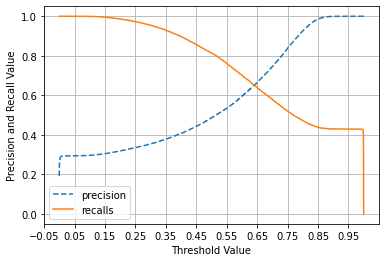

In [130]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
             
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, logreg1.predict_proba(X_test)[:,1])